In [1]:
import os
from skimage import data, io, color, transform
import numpy as np
import pandas as pd
import cv2 as cv
from sklearn.model_selection import train_test_split
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

from sklearn.metrics import confusion_matrix
from collections import OrderedDict
import itertools

In [2]:
catla_img_path = "resized_no_aug/Local/Catla/"
carpio_img_path = "resized_no_aug/Local/Cyprinus_carpio/"
carp_img_path = "resized_no_aug/Local/Grass_carp/"
mori_img_path = "resized_no_aug/Local/Mori/"
rohu_img_path = "resized_no_aug/Local/Rohu/"
silver_img_path = "resized_no_aug/Local/Silver/"

black_sea_sprat_img_path = "resized_no_aug/Coastal/Black_Sea_Sprat/"
gilt_head_bream_img_path = "resized_no_aug/Coastal/Gilt_Head_Bream/"
horse_mackerel_img_path = "resized_no_aug/Coastal/Horse_Mackerel/"
red_sea_bream_img_path = "resized_no_aug/Coastal/Red_Sea_Bream/"
sea_bass_img_path = "resized_no_aug/Coastal/Sea_Bass/"
trout_img_path = "resized_no_aug/Coastal/Trout/"

In [3]:
catla_img_list = os.listdir(catla_img_path)
carpio_img_list = os.listdir(carpio_img_path)
carp_img_list = os.listdir(carp_img_path)
mori_img_list = os.listdir(mori_img_path)
rohu_img_list = os.listdir(rohu_img_path)
silver_img_list = os.listdir(silver_img_path)

black_sea_sprat_img_list = os.listdir(black_sea_sprat_img_path)
gilt_head_bream_img_list = os.listdir(gilt_head_bream_img_path)
horse_mackerel_img_list = os.listdir(horse_mackerel_img_path)
red_sea_bream_img_list = os.listdir(red_sea_bream_img_path)
sea_bass_img_list = os.listdir(sea_bass_img_path)
trout_img_list = os.listdir(trout_img_path)

In [4]:
fish_list = [catla_img_list, carpio_img_list, carp_img_list, mori_img_list, rohu_img_list, silver_img_list, black_sea_sprat_img_list, gilt_head_bream_img_list, horse_mackerel_img_list, red_sea_bream_img_list, sea_bass_img_list, trout_img_list]
path_list = [catla_img_path, carpio_img_path, carp_img_path, mori_img_path, rohu_img_path, silver_img_path, black_sea_sprat_img_path, gilt_head_bream_img_path, horse_mackerel_img_path, red_sea_bream_img_path, sea_bass_img_path, trout_img_path]

fish_feature = []
fish_label = []
label = 0
for i in range(0,12):
	for f in fish_list[i]:
		f_name = path_list[i]+f
		fish_read = io.imread(f_name)
		fish = cv.cvtColor(fish_read, cv.COLOR_BGR2RGB)
		# fish_shape = fish.shape
		# feature = np.reshape(fish, fish_shape[0]*fish_shape[1]*fish_shape[2])
		fish_feature.append(fish)
		fish_label.append(label)
	
	label+=1

In [5]:
fish_features = np.array(fish_feature)
fish_labels = np.array(fish_label)

In [6]:
fish_features.shape

(549, 100, 100, 3)

In [7]:
fish_labels.shape

(549,)

In [8]:
features = fish_features.astype('float32')/255
labels = to_categorical(fish_labels)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20, random_state = 0)

In [10]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (439, 100, 100, 3)
X_test: (110, 100, 100, 3)
y_train: (439, 12)
y_test: (110, 12)


In [11]:
#build_model
cnn=Sequential()

cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(100, 100, 3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))

cnn.add(Flatten())

cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(units=64, activation='relu'))
cnn.add(Dropout(0.2))
# cnn.add(Dense(units=32, activation='relu'))
# cnn.add(Dropout(0.2))
cnn.add(Dense(units=12, activation='softmax'))

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 128)       0

In [13]:
model=cnn.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.1)
print('evaluation')
loss, accuracy = cnn.evaluate(X_test, y_test)

Epoch 1/20
4/4 [==============================] - 5s 988ms/step - loss: 2.7402 - accuracy: 0.1013 - val_loss: 2.4800 - val_accuracy: 0.1136
Epoch 2/20
4/4 [==============================] - 4s 951ms/step - loss: 2.4807 - accuracy: 0.1038 - val_loss: 2.4765 - val_accuracy: 0.1136
Epoch 3/20
4/4 [==============================] - 4s 906ms/step - loss: 2.4573 - accuracy: 0.1291 - val_loss: 2.4543 - val_accuracy: 0.1136
Epoch 4/20
4/4 [==============================] - 4s 913ms/step - loss: 2.4472 - accuracy: 0.1468 - val_loss: 2.4323 - val_accuracy: 0.1136
Epoch 5/20
4/4 [==============================] - 4s 912ms/step - loss: 2.4203 - accuracy: 0.1468 - val_loss: 2.4085 - val_accuracy: 0.1364
Epoch 6/20
4/4 [==============================] - 4s 909ms/step - loss: 2.3890 - accuracy: 0.1620 - val_loss: 2.3754 - val_accuracy: 0.1818
Epoch 7/20
4/4 [==============================] - 4s 909ms/step - loss: 2.3500 - accuracy: 0.1823 - val_loss: 2.3353 - val_accuracy: 0.1818
Epoch 8/20
4/4 [====

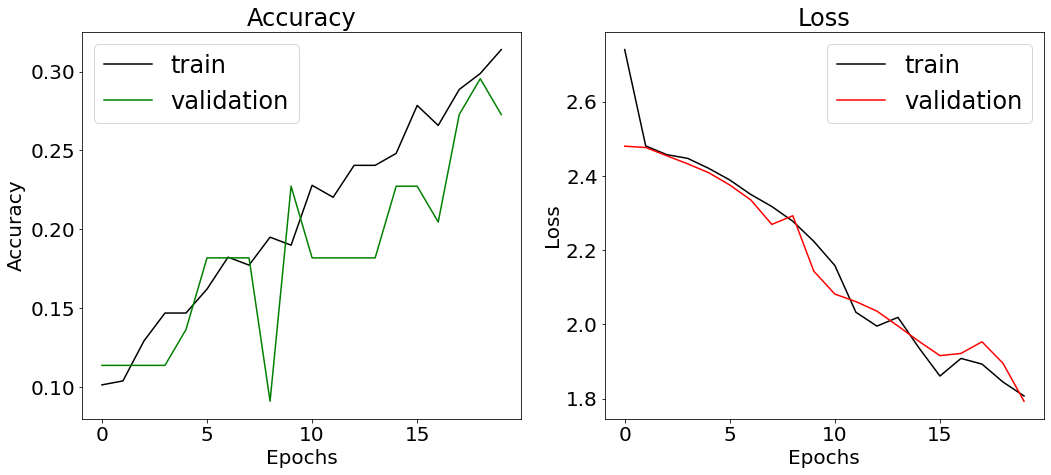

In [14]:
plt.figure(figsize=(15,7))

plt.rcParams.update({'font.size': 20})

plt.subplot(1,2,1)
plt.plot(model.history['accuracy'], label='train', color = 'k')
plt.plot(model.history['val_accuracy'], label='validation', color = 'g')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize ='large')

plt.subplot(1,2,2)
plt.plot(model.history['loss'], label='train', color = 'k')
plt.plot(model.history['val_loss'], label='validation', color = 'r')
plt.title('Loss', fontsize = 'large')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(fontsize ='large')

plt.tight_layout()
# plt.savefig('CNN_Result(78)_with_128f_onAGE.png',dpi =400)
plt.show()

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
genres = {'Catla': 0, 'Cyprinus carpio': 1, 'Grass Carp': 2, 'Mori': 3, 'Rohu': 4, 'Silver': 5, 'Black Sea Sprat':6, 'Gilt Head Bream':7, 'Horse Mackerel': 8, 'Red Sea Bream':9, 'Sea Bass':10, 'Trout':11}

4/4 [==============================] - 0s 52ms/step
[[ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  9  1  5  0  0  2  0  0  0]
 [ 4  4  3  4 13  6  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  1  0  1  0]
 [ 0  0  0  0  0  0  1  7  3  9  6  2]
 [ 0  0  0  0  0  0  0  0  4  0  1  0]
 [ 0  0  0  0  0  0  3  1  1  3  1  0]
 [ 0  0  0  0  0  0  0  0  0  1  1  0]
 [ 0  0  0  0  0  0  1  0  0  0  1  1]]
Normalized confusion matrix


C:\Users\sajal\AppData\Local\Temp/ipykernel_14268/824455713.py:10: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


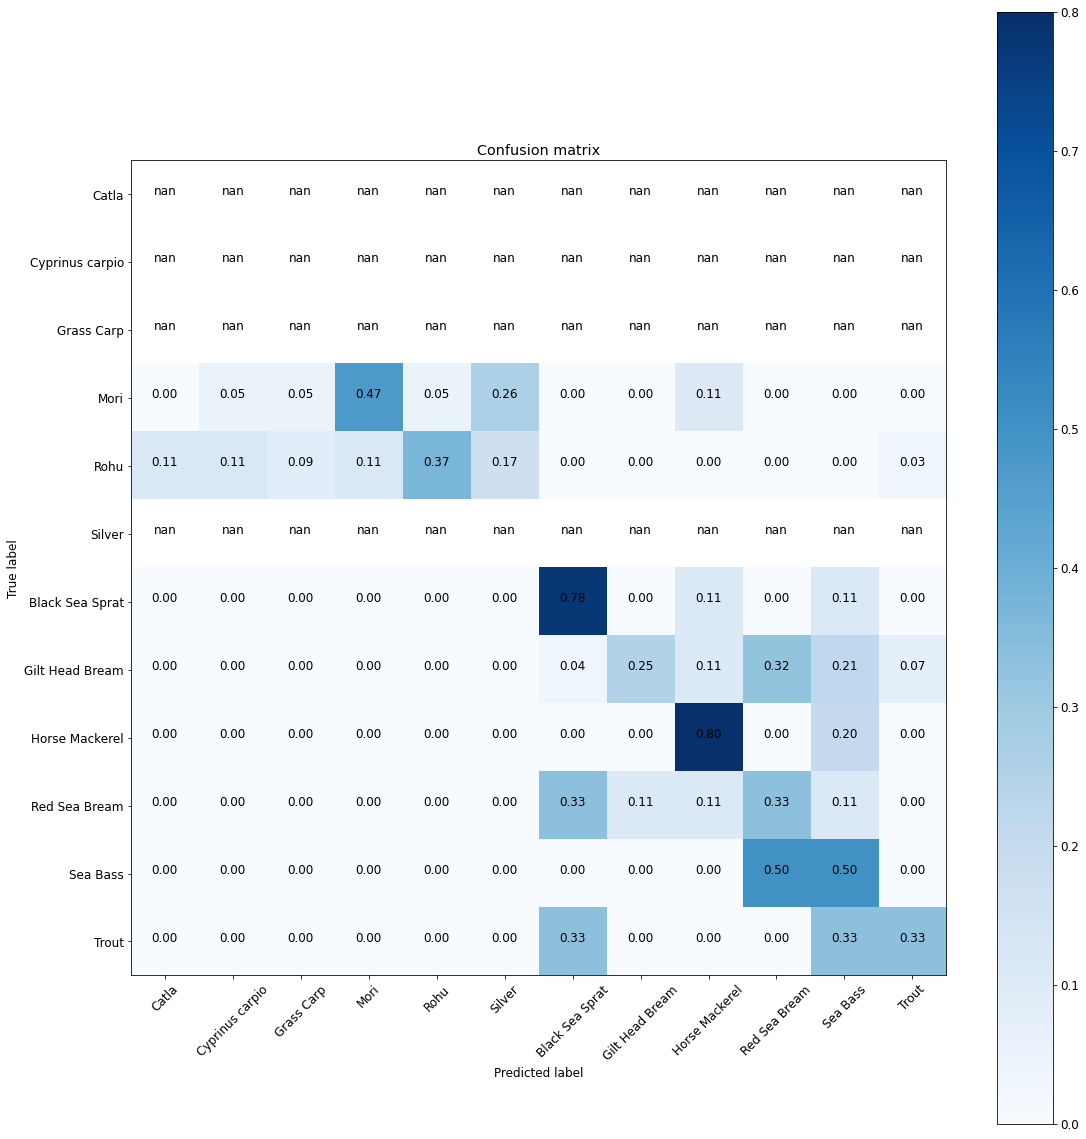

In [17]:
preds = np.argmax(cnn.predict(X_test), axis = 1)
y_orig = np.argmax(y_test, axis = 1)
cm = confusion_matrix(preds, y_orig)
print(cm)

keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(16,16))
plot_confusion_matrix(cm, keys,normalize=True)